In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns

import pycarrot as pc

%load_ext autoreload
%autoreload 2

pd.options.display.max_columns = 2000

sns.set_theme()

In [10]:
bc = load_breast_cancer()
X = pd.DataFrame(bc.data, columns=bc.feature_names)
y = pd.Series(bc.target, name="class")
df = pd.concat([X, y], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df = pd.read_csv(
    "./data/breast_cancer_cat/breast-cancer.data",
    names=[
        "class",
        "age",
        "menopause",
        "tumor-size",
        "inv-nodes",
        "node-caps",
        "deg-malig",
        "breast",
        "breast-quad",
        "irradiat",
    ],
)
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [ ]:
pc.feat_analysis.get_distribution(df)

TypeError: The y variable is categorical, but one of ['numeric', 'datetime'] is required

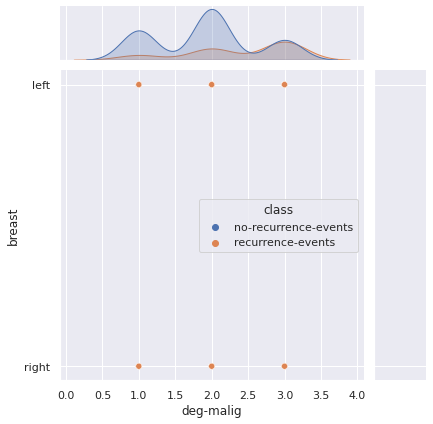

In [5]:
sns.jointplot(data=df, x="deg-malig", y="breast", hue="class")

## Training

In [7]:
df.columns

Index(['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat'],
      dtype='object')

In [8]:
config = pc.init_config("./config_bc.yml")
config

{'modelling': {'target_clf': 'class',
  'numeric_cols': ['mean radius',
   'mean texture',
   'mean perimeter',
   'mean area',
   'mean smoothness',
   'mean compactness',
   'mean concavity',
   'mean concave points',
   'mean symmetry',
   'mean fractal dimension',
   'radius error',
   'texture error',
   'perimeter error',
   'area error',
   'smoothness error',
   'compactness error',
   'concavity error',
   'concave points error',
   'symmetry error',
   'fractal dimension error',
   'worst radius',
   'worst texture',
   'worst perimeter',
   'worst area',
   'worst smoothness',
   'worst compactness',
   'worst concavity',
   'worst concave points',
   'worst symmetry',
   'worst fractal dimension'],
  'categorical_cols': None}}

In [12]:
setup, X_sample, y_sample = pc.modelling.prepare_data(
    train_data=df,
    config=config,
)

encoded


In [22]:
compare_df, model_dict = pc.modelling.compare_algorithms(
    setup=setup,
    include=[
        "lr",
        "dt",
        "rf",
        "ridge",
        "perceptron",
        "passive-aggressive",
        "extratree",
        "extratrees",
        "knn",
        "nb",
        "linearsvc",
        "rbfsvc",
    ],
    sort="f1",
    return_models=True,
)
compare_df

/home/george/Desktop/pycarrot/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/george/Desktop/pycarrot/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

In [ ]:
model_dict

In [ ]:
algorithm, reference_metric = compare_df.loc[
    compare_df["algorithm"] == "extratrees", ["algorithm", "f1"]
].values[0]
best_feature_list = pc.modelling.reduce_feature_space(
    setup, algorithm, "f1", reference_metric, acceptable_loss=0.5
)
best_feature_list